# Traing script

In [1]:
import os
import time
import torch.optim as optim

from translators import Config
from translators.cores.functions import plot_figure, save_train_history
from translators.models import save_checkpoint
from translators.model_builder import build_model, build_tokenizer, build_dataset, build_criterion
from translators.bin import NMTTrainer
from translators.logger import logger, init_logger

Read config file and load parameters

In [ ]:
logger.info('Reading configuation file ...')
cnf = Config("examples/GNMT_Config.yaml", "GNMT")

Init tokenizer from vocabulary file and build log file

In [3]:
init_logger(log_file=os.path.join(cnf.save_dir, "train_nmt_model.log"), log_file_level='INFO')
tokenizer = build_tokenizer(cnf)

Building Tokenizer from datasets/bpe_data/vocab.bpe.10000 ...




In [4]:
nmtmodel = build_model(cnf)

Building Model ...
GNMT(
  (encoder): RREncoder(
    (embedder): Embedder(
      (emb_lut): Embedding(10340, 300, padding_idx=0)
    )
    (encoder_layers): ModuleList(
      (0): LSTM(300, 300, batch_first=True, bidirectional=True)
      (1): LSTM(600, 300, batch_first=True)
      (2): LSTM(300, 300, batch_first=True)
      (3): LSTM(300, 300, batch_first=True)
      (4): LSTM(300, 300, batch_first=True)
      (5): LSTM(300, 300, batch_first=True)
      (6): LSTM(300, 300, batch_first=True)
      (7): LSTM(300, 300, batch_first=True)
    )
    (dropout): Dropout(p=0.2, inplace=False)
  )
  (decoder): RRDecoder(
    (embedder): Embedder(
      (emb_lut): Embedding(10340, 300, padding_idx=0)
    )
    (att_rnn): RecurrentAttention(
      (bottom_layer): LSTM(300, 300, batch_first=True)
      (attn): BahdanauAttention(
        (linear_q): Linear(in_features=300, out_features=300, bias=False)
        (linear_k): Linear(in_features=300, out_features=300, bias=False)
        (softmax): Soft

In [5]:
dataset, fields = build_dataset(cnf, tokenizer)

Building Corpus ...
	Reading train dataset ...
		Source file: datasets/bpe_data/dev.BPE.10000.en
		Target file: datasets/bpe_data/dev.BPE.10000.vi
	Reading dev dataset ...
		Source file: datasets/bpe_data/dev.BPE.10000.en
		Target file: datasets/bpe_data/dev.BPE.10000.vi
	Reading test dataset ...
		Source file: datasets/bpe_data/test.BPE.10000.en
		Target file: datasets/bpe_data/test.BPE.10000.vi


###############Corpus Summary###############
Batch size: 16
Min length: 1
Max length: 256
Num of train examples: 1,553
Num of eval examples: 1,553
Num of test examples: 1,268




In [6]:
criterion = build_criterion(cnf.vocab_size, tokenizer.vocab.stoi[tokenizer.pad_token], cnf.device)
optimizer = optim.Adam(nmtmodel.parameters(), lr=cnf.learning_rate)

In [7]:
trainer = NMTTrainer(config=cnf, model=nmtmodel, criterion=criterion, optimizer=optimizer, pad_idx=fields[0].vocab.stoi[fields[0].pad_token])

###############Training Parameter###############
Vocabulary size: 10,340
Num of epochs: 1000
Learning rate: 0.001
Batch size: 16
Device: cuda
Early stop: 20
Save dir: 'outputs/'




In [8]:
train_iter = dataset['train'].iter_dataset()
eval_iter = dataset['eval'].iter_dataset()

In [9]:
best_eval_loss = float('inf')
best_epoch = 0
best_training_step = 0
bad_loss_count = 0
total_epoch = 0
total_time = time.time()

Starting epoch 0:
EVAL: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [00:02<00:00, 34.35it/s]
	TRAIN	| AVG LOSS: 6.489542669179488 |	ACC: 7.3878% |	 Perplexity: 658.2223 |	EPOCH TIME: 0.2341 minutes|	lr: 0.001
	EVAL	| AVG LOSS: 5.936029229845319 |	ACC: 9.3493% |	 Perplexity: 378.4293 |	EPOCH TIME: 0.0476 minutes|	lr: 0.001
Best model was saved in outputs/nmt_model_chkpt.pt !!!
Starting epoch 1:
EVAL: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [00:02<00:00, 33.75it/s]
	TRAIN	| AVG LOSS: 5.848959849805248 |	ACC: 

	EVAL	| AVG LOSS: 2.9805585699422017 |	ACC: 37.8095% |	 Perplexity: 19.6988 |	EPOCH TIME: 0.0488 minutes|	lr: 0.001
Best model was saved in outputs/nmt_model_chkpt.pt !!!
Starting epoch 9:
EVAL: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [00:02<00:00, 33.44it/s]
	TRAIN	| AVG LOSS: 3.1301459609245765 |	ACC: 35.5220% |	 Perplexity: 22.8773 |	EPOCH TIME: 0.2328 minutes|	lr: 0.001
	EVAL	| AVG LOSS: 2.6750499387176667 |	ACC: 43.0123% |	 Perplexity: 14.5131 |	EPOCH TIME: 0.0489 minutes|	lr: 0.001
Best model was saved in outputs/nmt_model_chkpt.pt !!!
Starting epoch 10:
EVAL: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

EVAL: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [00:02<00:00, 34.14it/s]
	TRAIN	| AVG LOSS: 1.0369931240471042 |	ACC: 75.2230% |	 Perplexity: 2.8207 |	EPOCH TIME: 0.2308 minutes|	lr: 0.001
	EVAL	| AVG LOSS: 0.7505741320094284 |	ACC: 83.2979% |	 Perplexity: 2.1182 |	EPOCH TIME: 0.0479 minutes|	lr: 0.001
Best model was saved in outputs/nmt_model_chkpt.pt !!!
Starting epoch 18:
EVAL: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [00:02<00:00, 33.37it/s]
	TRAIN	| AVG LOSS: 0.8585338635104043 |	ACC: 79.4773% |	 Perp

EVAL: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [00:02<00:00, 33.67it/s]
	TRAIN	| AVG LOSS: 0.2264335857970374 |	ACC: 95.3334% |	 Perplexity: 1.2541 |	EPOCH TIME: 0.2308 minutes|	lr: 0.001
	EVAL	| AVG LOSS: 0.1775519889684356 |	ACC: 96.6213% |	 Perplexity: 1.1943 |	EPOCH TIME: 0.0485 minutes|	lr: 0.001
Best model was saved in outputs/nmt_model_chkpt.pt !!!
Starting epoch 27:
EVAL: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [00:02<00:00, 33.62it/s]
	TRAIN	| AVG LOSS: 0.1984230793860494 |	ACC: 96.0016% |	 Perp

	EVAL	| AVG LOSS: 0.059824424206602334 |	ACC: 98.9842% |	 Perplexity: 1.0617 |	EPOCH TIME: 0.0479 minutes|	lr: 0.001
Best model was saved in outputs/nmt_model_chkpt.pt !!!
Starting epoch 35:
EVAL: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [00:02<00:00, 34.26it/s]
	TRAIN	| AVG LOSS: 0.06642762761639089 |	ACC: 98.8872% |	 Perplexity: 1.0687 |	EPOCH TIME: 0.2266 minutes|	lr: 0.001
	EVAL	| AVG LOSS: 0.05419353823348576 |	ACC: 99.1567% |	 Perplexity: 1.0557 |	EPOCH TIME: 0.0477 minutes|	lr: 0.001
Best model was saved in outputs/nmt_model_chkpt.pt !!!
Starting epoch 36:
EVAL: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

	EVAL	| AVG LOSS: 0.060874348506331444 |	ACC: 98.7498% |	 Perplexity: 1.0628 |	EPOCH TIME: 0.0488 minutes|	lr: 0.001
Starting epoch 44:
EVAL: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [00:02<00:00, 33.55it/s]
	TRAIN	| AVG LOSS: 0.07133383752436054 |	ACC: 98.4669% |	 Perplexity: 1.0739 |	EPOCH TIME: 0.2317 minutes|	lr: 0.001
	EVAL	| AVG LOSS: 0.06378638041110671 |	ACC: 98.7175% |	 Perplexity: 1.0659 |	EPOCH TIME: 0.0487 minutes|	lr: 0.001
Starting epoch 45:
EVAL: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [00

Starting epoch 53:
EVAL: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [00:02<00:00, 33.53it/s]
	TRAIN	| AVG LOSS: 0.052984230904554834 |	ACC: 98.8441% |	 Perplexity: 1.0544 |	EPOCH TIME: 0.2294 minutes|	lr: 0.001
	EVAL	| AVG LOSS: 0.04191082721690134 |	ACC: 99.2133% |	 Perplexity: 1.0428 |	EPOCH TIME: 0.0487 minutes|	lr: 0.001
Best model was saved in outputs/nmt_model_chkpt.pt !!!
Starting epoch 54:
EVAL: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [00:02<00:00, 33.79it/s]
	TRAIN	| AVG LOSS: 0.05349614613746502 

Starting epoch 62:
TRAIN:   1%|██▊                                                                                                                                                                                                                                                                              | 1/98 [00:00<00:17,  5.55it/s]


Performed 63 iterations and 12,154 steps in a total of 14.4763 minutes
Achieve the best model at the 57st iteration and and the 11,368th step
The lowest EVAL Loss is 0.0383.
Training history was saved in outputs/training_history.png !!!


Training loss diagrams was saved in outputs/training_loss.png !!!


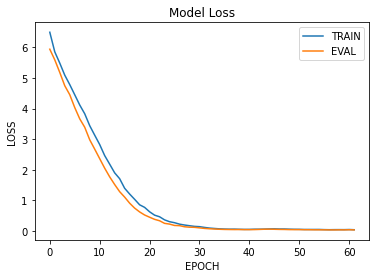

Training acc diagrams was saved in outputs/training_acc.png !!!


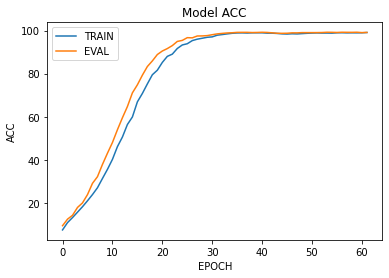

Training ppl diagrams was saved in outputs/training_perplexity.png !!!


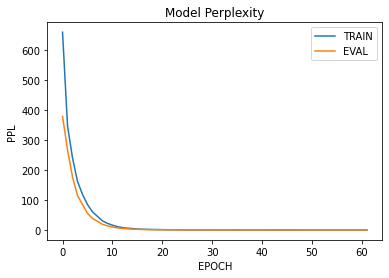



Performed 63 iterations and 12,154 steps in a total of 26457488.041 minutes
Achieve the best model at the 57st iteration and and the 11,368th step
The lowest EVAL Loss is 0.0383.
Training history was saved in outputs/training_history.png !!!


Training loss diagrams was saved in outputs/training_loss.png !!!


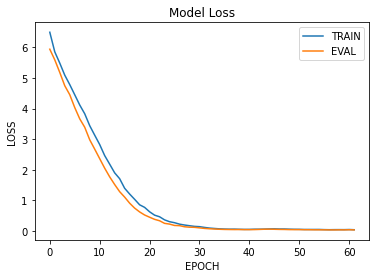

Training acc diagrams was saved in outputs/training_acc.png !!!


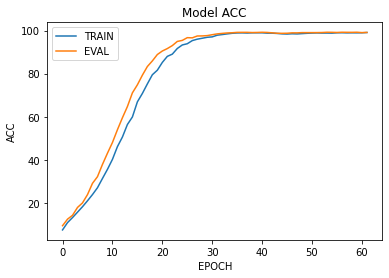

Training ppl diagrams was saved in outputs/training_perplexity.png !!!


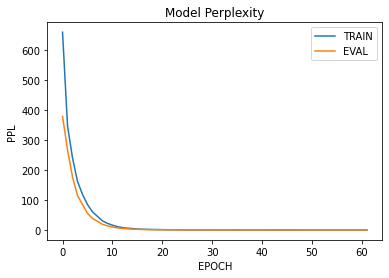

In [10]:
try:
    for epoch in range(cnf.epochs):
        total_epoch += 1
        logger.info(f'Starting epoch {epoch}:')
        train_stats = trainer.optimize(train_iter)
        eval_stats = trainer.evaluate(eval_iter, epoch)
        trainer.print_stats(train_stats, mode='TRAIN')
        trainer.print_stats(eval_stats, mode='EVAL')
        if eval_stats.avg_loss() < best_eval_loss:
            save_checkpoint(cnf=cnf, model=nmtmodel, optimizer=optimizer, fields=fields, epoch=epoch)
            bad_loss_count = 0
            best_epoch = epoch
            best_training_step = trainer.training_step
            best_eval_loss = eval_stats.avg_loss()
            continue
        bad_loss_count += 1
        if not cnf.early_stop == 0 and bad_loss_count > cnf.early_stop:
            logger.info("Early stopping !!!")
            break
except KeyboardInterrupt:
    total_time = round((time.time() - total_time)/60, 4)
    logger.info(f'{"=" * 40}')
    logger.info('\n')
    logger.info(f"Performed {total_epoch} iterations and {trainer.training_step:,} steps in a total of {total_time} minutes")
    logger.info(f"Achieve the best model at the {best_epoch}st iteration and and the {best_training_step:,}th step")
    logger.info(f"The lowest EVAL Loss is {best_eval_loss:.4f}.")
    save_train_history(cnf.save_dir, trainer.historys)
    logger.info(f'{"=" * 40}')
    logger.info('\n')
    plot_figure(cnf.save_dir, trainer.historys)
except Exception as e:
    print(e)
total_time = round((time.time() - total_time)/60, 4)
logger.info(f'{"=" * 40}')
logger.info('\n')
logger.info(f"Performed {total_epoch} iterations and {trainer.training_step:,} steps in a total of {total_time} minutes")
logger.info(f"Achieve the best model at the {best_epoch}st iteration and and the {best_training_step:,}th step")
logger.info(f"The lowest EVAL Loss is {best_eval_loss:.4f}.")
save_train_history(cnf.save_dir, trainer.historys)
logger.info(f'{"=" * 40}')
logger.info('\n')
plot_figure(cnf.save_dir, trainer.historys)